In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import seaborn as sns

In [2]:
ds = xr.open_dataset('C:\\Users\\henri\\Documents\\NC_H08_20201101_0000_L2CLP010_FLDK.02401_02401.nc')

In [3]:
# variables

ds.data_vars

Data variables:
    Hour     (latitude, longitude) timedelta64[ns] ...
    CLOT     (latitude, longitude) float32 ...
    CLTT     (latitude, longitude) float32 ...
    CLTH     (latitude, longitude) float32 ...
    CLER_23  (latitude, longitude) float32 ...
    CLTYPE   (latitude, longitude) float32 ...
    QA       (latitude, longitude) float32 ...

In [4]:
# dimensions

ds.dims

Frozen({'latitude': 2401, 'longitude': 2401})

In [5]:
# coordinates

ds.coords

Coordinates:
  * latitude   (latitude) float32 60.0 59.95 59.9 59.85 ... -59.9 -59.95 -60.0
  * longitude  (longitude) float32 80.0 80.05 80.1 80.15 ... 199.9 200.0 200.0

In [6]:
ds.attrs

{'title': 'Himawari-8 AHI equal latitude-longitude map data - CLPR',
 'summary': 'N/A',
 'keywords': 'Himawari8',
 'id': 'NC_H08_20201101_0000_R21CLPR_FLDK.02401_02401.nc',
 'comment': 'N/A',
 'date_created': '20201101 02:16:14.000',
 'creator_name': 'N/A',
 'creator_url': 'N/A',
 'creator_email': 'N/A',
 'insitution': 'N/A',
 'project': 'N/A',
 'pixel_number': 2401,
 'line_number': 2401,
 'upper_left_latitude': 60.0,
 'upper_left_longitude': 80.0,
 'grid_interval': 0.05}

In [7]:
# subsetting

scale = 0.01
CER = ds['CLER_23'].isel(latitude = slice(11, 15), longitude = slice(122, 125)) *  scale

In [8]:
# subsetting

scale = 0.01
COT = ds['CLOT'].isel(latitude = slice(11, 15), longitude = slice(122, 125)) *  scale

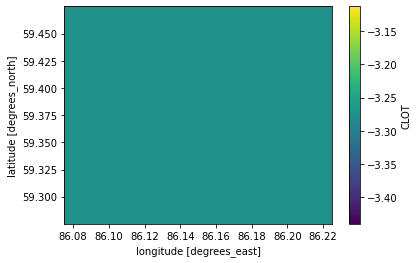

In [9]:
COT.plot(robust = True)

In [10]:
# subsetting

CLTYPE = ds['CLTYPE'].sel(latitude = 15, longitude = 122) 
CLTYPE

<xarray.DataArray 'CLTYPE' ()>
array(3., dtype=float32)
Coordinates:
    latitude   float32 15.0
    longitude  float32 122.0
Attributes:
    long_name:    Cloud Type under ISCCP Cloud Type Classification Definition
    units:        Dimensionless
    valid_min:    0
    valid_max:    10
    description:  0=Clear, 1=Ci, 2=Cs, 3=Deep convection, 4=Ac, 5=As, 6=Ns, 7...

In [11]:
# subsetting

scale = 0.01
COT = ds['CLOT'].sel(latitude = 15, longitude = 122) *  scale

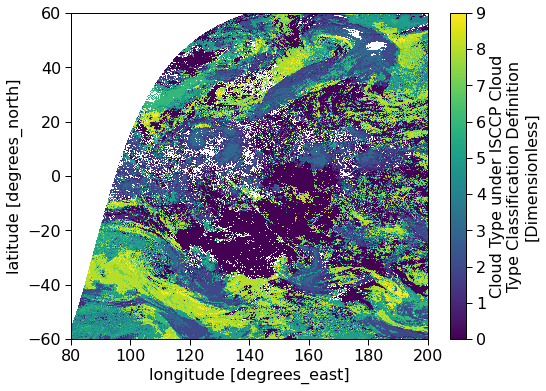

In [68]:
ds['CLTYPE'].plot()

In [13]:
ds['CLTYPE'].sel(latitude = slice(11, 15), longitude = slice(122,125))

<xarray.DataArray 'CLTYPE' (latitude: 0, longitude: 61)>
array([], shape=(0, 61), dtype=float32)
Coordinates:
  * latitude   (latitude) float32 
  * longitude  (longitude) float32 122.0 122.1 122.1 122.2 ... 124.9 124.9 125.0
Attributes:
    long_name:    Cloud Type under ISCCP Cloud Type Classification Definition
    units:        Dimensionless
    valid_min:    0
    valid_max:    10
    description:  0=Clear, 1=Ci, 2=Cs, 3=Deep convection, 4=Ac, 5=As, 6=Ns, 7...

In [14]:
ds['CLTYPE'].sel(longitude = slice(122, 125)).sel(latitude = 15)

<xarray.DataArray 'CLTYPE' (longitude: 61)>
array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2., nan, nan,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.], dtype=float32)
Coordinates:
    latitude   float32 15.0
  * longitude  (longitude) float32 122.0 122.1 122.1 122.2 ... 124.9 124.9 125.0
Attributes:
    long_name:    Cloud Type under ISCCP Cloud Type Classification Definition
    units:        Dimensionless
    valid_min:    0
    valid_max:    10
    description:  0=Clear, 1=Ci, 2=Cs, 3=Deep convection, 4=Ac, 5=As, 6=Ns, 7...

In [15]:
ds['CLTYPE'].sel(longitude = slice(122, 125)).sel(latitude = slice(10, 16))

<xarray.DataArray 'CLTYPE' (latitude: 0, longitude: 61)>
array([], shape=(0, 61), dtype=float32)
Coordinates:
  * latitude   (latitude) float32 
  * longitude  (longitude) float32 122.0 122.1 122.1 122.2 ... 124.9 124.9 125.0
Attributes:
    long_name:    Cloud Type under ISCCP Cloud Type Classification Definition
    units:        Dimensionless
    valid_min:    0
    valid_max:    10
    description:  0=Clear, 1=Ci, 2=Cs, 3=Deep convection, 4=Ac, 5=As, 6=Ns, 7...

In [3]:
CLTYPE_ALBAY = ds['CLTYPE'].where((ds['CLTYPE'].latitude >= 11) & (ds['CLTYPE'].latitude <= 15) & 
      (ds['CLTYPE'].longitude >= 122) & (ds['CLTYPE'].longitude <= 125), drop = True)

Text(0.5, 1.0, 'Cloud Type \n ')

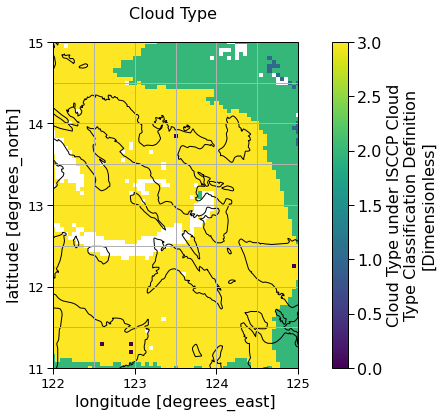

In [35]:
plt.style.use('notebook')
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
CLTYPE_ALBAY.plot(ax = ax, transform = ccrs.PlateCarree())
ax.set_extent((122, 125, 11, 15))
ax.set_xticks((122, 123, 124, 125))
ax.set_yticks((11, 12, 13, 14, 15))
ax.tick_params(axis='both', labelsize=13)
ax.set_title('Cloud Type \n ')

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.18264843, 0.        , 0.        , 3.15068543],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.09661837, 0.        , 0.        , 3.23671549],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.14492756, 0.        , 0.        , 3.1884063 ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.14084509, 0.        , 0.        , 3.19248877],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.14084509, 0.        , 0.        , 3.19248877],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.09259261, 0.        , 0.        , 3.24074126],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.09523811, 0.        , 0.        , 3.23809575],
        [0.        , 0.    

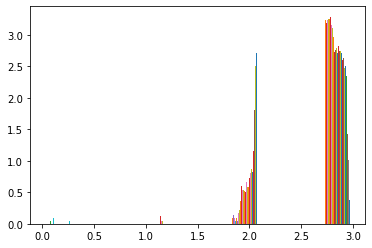

In [22]:
plt.hist(CLTYPE_ALBAY, density = True)

In [21]:
CLTYPE_ALBAY.values

array([[3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.],
       ...,
       [2., 3., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]], dtype=float32)

In [26]:
COT_ALBAY = ds['CLOT'].where((ds['CLOT'].latitude >= 11) & (ds['CLOT'].latitude <= 15) & 
      (ds['CLOT'].longitude >= 122) & (ds['CLOT'].longitude <= 125), drop = True) * 0.01

In [30]:
ds['CLOT'].values

array([[-3.2764999e+02, -3.2764999e+02, -3.2764999e+02, ...,
         4.2999998e-01, -3.2759000e+02, -3.2759000e+02],
       [-3.2764999e+02, -3.2764999e+02, -3.2764999e+02, ...,
        -3.2759000e+02, -3.2759000e+02,  9.9999994e-02],
       [-3.2764999e+02, -3.2764999e+02, -3.2764999e+02, ...,
        -3.2759000e+02,  2.0000000e-02,  2.8000000e-01],
       ...,
       [ 6.1999998e+00,  6.1299996e+00,  4.0400000e+00, ...,
         4.6300001e+00,  3.7200000e+00,  4.1999998e+00],
       [ 5.3800001e+00,  5.3199997e+00,  5.0599999e+00, ...,
         5.0099998e+00,  5.6399999e+00,  4.1399999e+00],
       [ 3.5999999e+00,  2.9299998e+00,  2.4600000e+00, ...,
         3.6399999e+00,  3.8599999e+00,  3.8599999e+00]], dtype=float32)

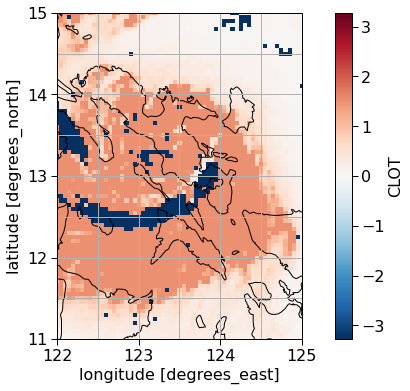

In [26]:
plt.style.use('notebook')
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
COT_ALBAY.plot(ax = ax, transform = ccrs.PlateCarree())
ax.set_extent((122, 125, 11, 15))
ax.set_xticks((122, 123, 124, 125))
ax.set_yticks((11, 12, 13, 14, 15))

(array([[0.20676934, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.38769249, 0.38769242, 1.11138522],
        [0.31015401, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.41353866, 0.36184626, 1.00800055],
        [0.31015401, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.41353866, 0.41353858, 0.95630821],
        [0.25846168, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.41353866, 0.49107707, 0.93046204],
        [0.25846168, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.38769249, 0.31015394, 1.13723139],
        [0.23261551, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.33600016, 0.49107707, 1.03384671],
        [0.28430785, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.38769249, 0.38769242, 1.03384671],
        [0.18092318, 0.    

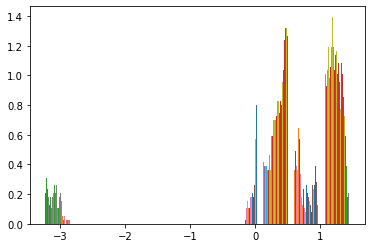

In [34]:
plt.hist(COT_ALBAY, density = True)

In [37]:
CLTYPE_ALBAY.shape

(81, 61)

In [38]:
COT_ALBAY.shape

(81, 61)

ValueError: x and y must have the same length.

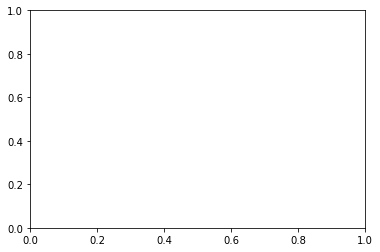

In [36]:
plt.hist2d(CLTYPE_ALBAY, )

Text(0.5, 1.0, 'Cloud Optical Thickness')

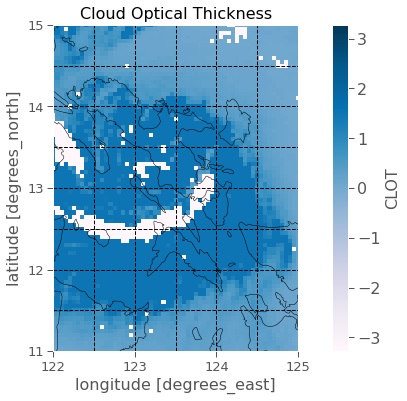

In [27]:
plt.style.use('notebook')
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
COT_ALBAY.plot(ax = ax, cmap = 'PuBu')
ax.set_xticks((122, 123, 124, 125))
ax.set_yticks((11, 12, 13, 14, 15))
ax.set_extent((122,125,11,15))
ax.tick_params(axis='both', labelsize=13)
ax.set_title('Cloud Optical Thickness')

In [44]:
# GPM IMERG

ds1 = xr.open_dataset("C:\\Users\\henri\\Downloads\\3B-HHR.MS.MRG.3IMERG.20201028-S180000-E182959.1080.V06B.HDF5.nc4")

In [45]:
ds1.data_vars

Data variables:
    precipitationQualityIndex       (time, lon, lat) float32 nan nan ... 0.2478
    IRkalmanFilterWeight            (time, lon, lat) float32 0.0 0.0 ... 0.0 0.0
    HQprecipSource                  (time, lon, lat) float32 0.0 0.0 ... 0.0 0.0
    precipitationCal                (time, lon, lat) float32 nan nan ... 0.0 0.0
    lat_bnds                        (lat, latv) float32 -90.0 -89.9 ... 90.0
    precipitationUncal              (time, lon, lat) float32 nan nan ... 0.0 0.0
    HQprecipitation                 (time, lon, lat) float32 nan nan ... nan nan
    probabilityLiquidPrecipitation  (time, lon, lat) float32 0.0 0.0 ... 0.0 0.0
    HQobservationTime               (time, lon, lat) timedelta64[ns] NaT ... NaT
    randomError                     (time, lon, lat) float32 nan nan ... 0.2381
    time_bnds                       (time, nv) object 2020-10-28 18:00:00 202...
    IRprecipitation                 (time, lon, lat) float32 nan nan ... nan nan
    lon_bnds      

In [46]:
ds1.dims

Frozen({'time': 1, 'lon': 3600, 'lat': 1800, 'latv': 2, 'nv': 2, 'lonv': 2})

In [47]:
ds1.coords

Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * latv     (latv) int32 0 1
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * lonv     (lonv) int32 0 1
  * nv       (nv) int32 0 1
  * time     (time) object 2020-10-28 18:00:00

In [62]:
PRECIP_ALBAY = ds1['precipitationCal'].where((ds1['precipitationCal'].lat >= 11) & (ds1['precipitationCal'].lat <= 15) & 
      (ds1['precipitationCal'].lon >= 122) & (ds1['precipitationCal'].lon <= 125), drop = True) 

In [63]:
PRECIP_ALBAY

<xarray.DataArray 'precipitationCal' (time: 1, lon: 30, lat: 40)>
array([[[0.00117066, 0.00057272, 0.00226292, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.01665562, 0.        ],
        [0.        , 0.        , 0.02740041, ..., 0.08898091,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 11.05 11.15 11.25 11.35 ... 14.65 14.75 14.85 14.95
  * lon      (lon) float32 122.1 122.2 122.2 122.3 ... 124.7 124.8 124.8 124.9
  * time     (time) object 2020-10-28 18:00:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    origname:          precipitationCal
    fullnamepath:      /Grid/precipitationCal
    coordinates:       Grid_time Grid_lon Grid_lat

In [60]:
np.mean(PRECIP_ALBAY)

<xarray.DataArray 'precipitationCal' ()>
array(4.718839, dtype=float32)

Text(0.5, 1.0, 'Precipitation Rate')

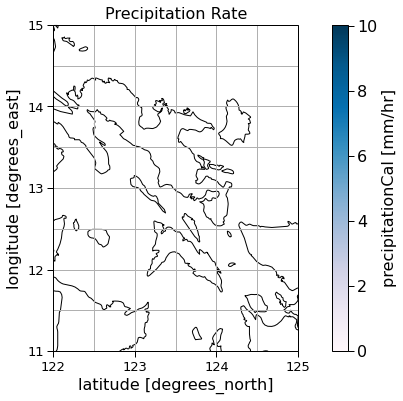

In [66]:
plt.style.use('notebook')
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
PRECIP_ALBAY.plot(ax = ax, cmap = 'PuBu')
ax.set_xticks((122, 123, 124, 125))
ax.set_yticks((11, 12, 13, 14, 15))
ax.set_extent((122,125,11,15))
ax.tick_params(axis='both', labelsize=13)
ax.set_title('Precipitation Rate')

In [52]:
from matplotlib.ticker import PercentFormatter

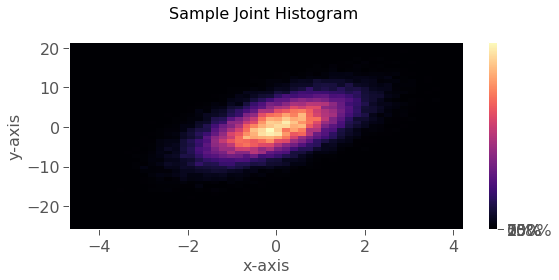

In [57]:
# Creating dataset
size = 50000
x = np.random.normal(size = size)
y = x * 3 + 4 * np.random.normal(size = size)
  
fig, ax = plt.subplots(figsize =(8, 4))
# Creating plot
plt.title("Sample Joint Histogram \n")
cax = plt.hist2d(x, y, bins = 50, cmap = 'magma')
  
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
color_ax = fig.colorbar(cax[3])
#cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

color_ax.set_ticks([0, .25, .50, .75, 1])
color_ax.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])

# show plot
plt.tight_layout() 
plt.style.use('grid')

In [55]:
df = pd.DataFrame(np.array(x), np.array(y))
df.head()

,0
0.315479,-1.129469
-6.681122,0.072598
-0.072094,-0.149735
-1.285552,-1.217761
0.952595,-0.342132


In [42]:
x.shape

(500000,)

In [43]:
df_COT = pd.DataFrame(COT_ALBAY)

In [46]:
df_COT.shape

(81, 61)

In [79]:
COT_ALBAY_arr = np.array(COT_ALBAY.values)

In [65]:
one_D_COT_ALBAY = np.ravel(COT_ALBAY_arr)

(array([0.12414635, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0995713 , 0.71776075, 0.24871634, 0.90334475]),
 array([-3.2766    , -2.79894   , -2.32128   , -1.84362   , -1.3659599 ,
        -0.88829994, -0.41063994,  0.06702004,  0.54468   ,  1.02234   ,
         1.5       ], dtype=float32),
 <BarContainer object of 10 artists>)

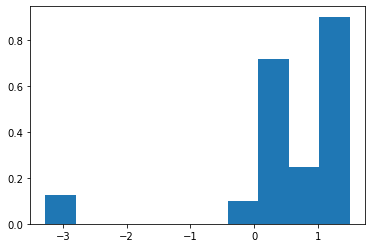

In [75]:
plt.hist(one_D_COT_ALBAY, density = True)

In [68]:
CLTYPE_ALBAY_arr = np.array(CLTYPE_ALBAY.values)
one_D_CLTYPE_ALBAY = np.ravel(CLTYPE_ALBAY_arr)

In [81]:
COT_ALBAY_arr = np.array(COT_ALBAY)

In [82]:
oneD_COT_ALBAY = np.ravel(COT_ALBAY_arr)

(array([ 293.,    0.,    0.,    0.,    0.,    0.,  235., 1694.,  587.,
        2132.]),
 array([-3.2766    , -2.79894   , -2.32128   , -1.84362   , -1.3659599 ,
        -0.88829994, -0.41063994,  0.06702004,  0.54468   ,  1.02234   ,
         1.5       ], dtype=float32),
 <BarContainer object of 10 artists>)

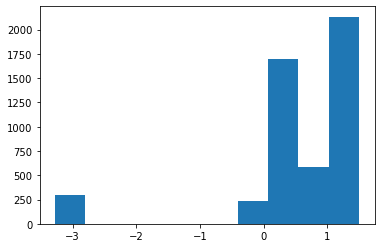

In [84]:
plt.hist(oneD_COT_ALBAY)

In [94]:
CLTYPE_ALBAY_arr = np.array(CLTYPE_ALBAY)
oneD_CLTYPE_ALBAY = np.ravel(CLTYPE_ALBAY_arr)

In [95]:
df_oneD_CLTYPE_ALBAY = pd.DataFrame(oneD_CLTYPE_ALBAY)

In [97]:
df_oneD_CLTYPE_ALBAY = df_oneD_CLTYPE_ALBAY.fillna(value = 0)

In [98]:
df_oneD_COT_ALBAY = pd.DataFrame(oneD_COT_ALBAY)
df_oneD_COT_ALBAY = df_oneD_COT_ALBAY.fillna(value = 0)

In [102]:
df_oneD_COT_ALBAY[0].head()

0    1.5
1    1.5
2    1.5
3    1.5
4    1.5
Name: 0, dtype: float32

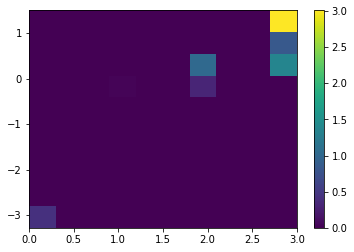

In [112]:
fig = plt.figure()
ax = plt.axes()

cax = plt.hist2d(df_oneD_CLTYPE_ALBAY[0], df_oneD_COT_ALBAY[0], density = True)
cb = fig.colorbar(cax[3])

(array([0.19766578, 0.        , 0.        , 0.01146866, 0.        ,
        0.        , 0.63280048, 0.        , 0.        , 2.4913989 ]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

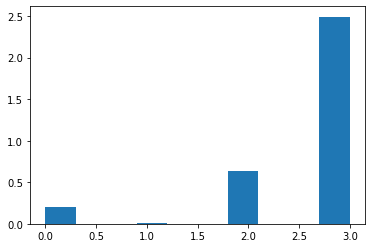

In [114]:
plt.hist(df_oneD_CLTYPE_ALBAY[0], density = True)

In [3]:
# algorithm to plot a 2d histogram from an xarray dataset

# apply the boundary conditions
CER_ALBAY = ds['CLER_23'].where((ds['CLER_23'].latitude >= 11) & (ds['CLER_23'].latitude <= 15) & 
      (ds['CLER_23'].longitude >= 122) & (ds['CLER_23'].longitude <= 125), drop = True) * 0.01

# converting the values into a 1D numpy array
CER_ALBAY_arr = np.array(CER_ALBAY)
CER_ALBAY_1darr = np.ravel(CER_ALBAY_arr)

# converting the 1D array to a dataframe so we can fill the NaN values
df_CER_ALBAY = pd.DataFrame(CER_ALBAY_1darr)
df_CER_ALBAY = df_CER_ALBAY.fillna(value = 0)

In [4]:
# algorithm to plot a 2d histogram from an xarray dataset

# apply the boundary conditions
COT_ALBAY = ds['CLOT'].where((ds['CLOT'].latitude >= 11) & (ds['CLOT'].latitude <= 15) & 
      (ds['CLOT'].longitude >= 122) & (ds['CLOT'].longitude <= 125), drop = True) * 0.01

# converting the values into a 1D numpy array
COT_ALBAY_arr = np.array(CER_ALBAY)
COT_ALBAY_1darr = np.ravel(CER_ALBAY_arr)

# converting the 1D array to a dataframe so we can fill the NaN values
df_COT_ALBAY = pd.DataFrame(CER_ALBAY_1darr)
df_COT_ALBAY = df_CER_ALBAY.fillna(value = 0)

In [5]:
plt.style.use('ggplot')

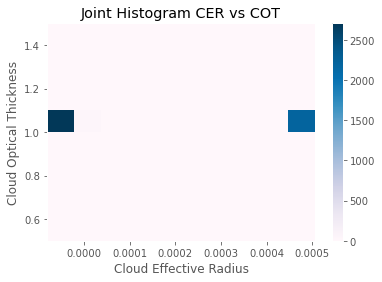

In [14]:
# plot the normalized joint percentage frequency histogram

fig = plt.figure()
ax = plt.axes()
cax = plt.hist2d(df_CER_ALBAY[0]/np.sum(df_CER_ALBAY[0]), df_COT_ALBAY[0]/df_COT_ALBAY[0], density = False, cmap = 'PuBu')
ax.set_ylabel('Cloud Optical Thickness')
ax.set_xlabel('Cloud Effective Radius')
ax.set_title('Joint Histogram CER vs COT')

# colorbar
cb = fig.colorbar(cax[3])

In [123]:
COT = ds['CLOT']
CER = ds['CLER_23']

# 1d array
COT_arr = np.array(COT)
CER_arr = np.array(CER)
COT_arr = np.ravel(COT_arr)
CER_arr = np.ravel(CER_arr)

# dataframe
df_COT = pd.DataFrame(COT_arr)
df_CER = pd.DataFrame(CER_arr)

# filling NaN values with 0

df_COT = df_COT.fillna(value = 0)
df_CER = df_CER.fillna(value = 0)

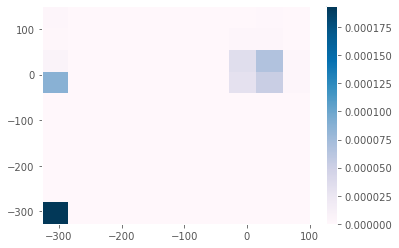

In [126]:
# plot the normalized joint percentage frequency histogram of CER vs COT

fig = plt.figure()
ax = plt.axes()
cax = plt.hist2d(x = df_CER[0], y = df_COT[0], density = True, cmap = 'PuBu')

# colorbar
cb = fig.colorbar(cax[3])

In [133]:
df_CER_norm = df_CER[0] / np.sum(df_CER[0])
df_COT_norm = df_COT[0] / np.sum(df_COT[0])

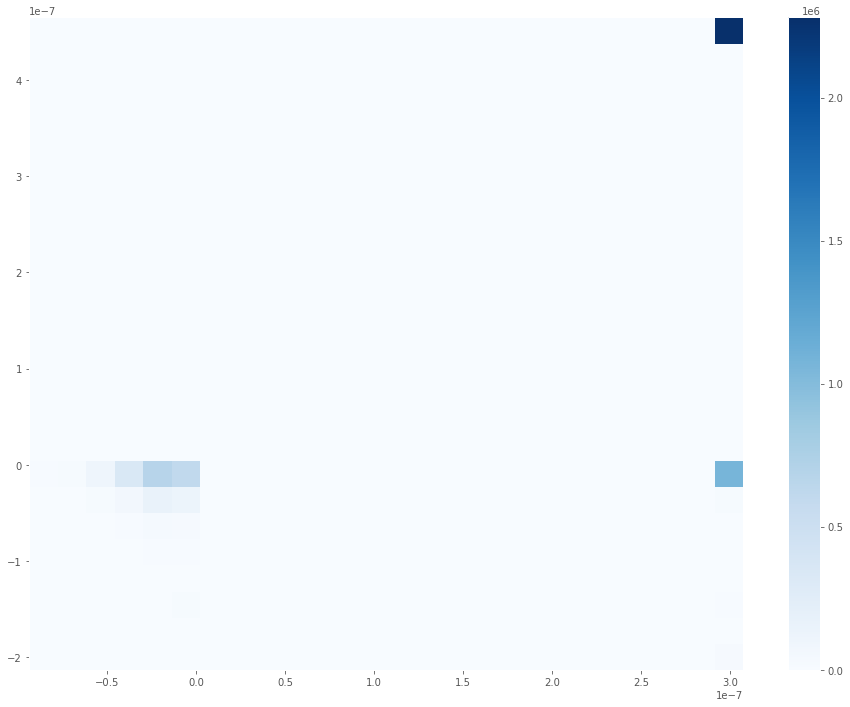

In [143]:
# plot the normalized joint percentage frequency histogram of CER vs COT

fig = plt.figure(figsize = (16,12))
ax = plt.axes()
cax = plt.hist2d(x = df_CER_norm, y = df_COT_norm, cmap = 'Blues', bins = 25)

# colorbar
cb = fig.colorbar(cax[3])

In [32]:
ds.data_vars

Data variables:
    Hour     (latitude, longitude) timedelta64[ns] 00:00:48.057292800 ... 00:...
    CLOT     (latitude, longitude) float32 -327.6 -327.6 -327.6 ... 3.86 3.86
    CLTT     (latitude, longitude) float32 -177.6 -177.6 -177.6 ... 232.4 232.4
    CLTH     (latitude, longitude) float32 -32.77 -32.77 -32.77 ... 6.65 6.646
    CLER_23  (latitude, longitude) float32 -327.6 -327.6 -327.6 ... 12.45 12.47
    CLTYPE   (latitude, longitude) float32 nan nan nan nan ... 2.0 2.0 2.0 2.0
    QA       (latitude, longitude) float32 1.0 1.0 1.0 ... 5.824e+04 5.824e+04

In [35]:
ds['CLTYPE'].values

array([[nan, nan, nan, ...,  4., nan, nan],
       [nan, nan, nan, ..., nan, nan,  4.],
       [nan, nan, nan, ..., nan,  7.,  4.],
       ...,
       [ 5.,  5.,  5., ...,  2.,  2.,  2.],
       [ 5.,  5.,  5., ...,  2.,  2.,  2.],
       [ 5.,  4.,  4., ...,  2.,  2.,  2.]], dtype=float32)

In [36]:
ds['CLTT'].values * 0.01 + 150

array([[148.2235, 148.2235, 148.2235, ..., 152.556 , 148.2241, 148.2241],
       [148.2235, 148.2235, 148.2235, ..., 148.2241, 148.2241, 152.5611],
       [148.2235, 148.2235, 148.2235, ..., 148.2241, 152.6051, 152.5495],
       ...,
       [152.4496, 152.4496, 152.4469, ..., 152.3342, 152.2995, 152.3203],
       [152.4717, 152.4717, 152.4522, ..., 152.3351, 152.356 , 152.3144],
       [152.4721, 152.4494, 152.4501, ..., 152.3213, 152.324 , 152.324 ]],
      dtype=float32)

In [38]:
ds1 = xr.open_dataset("C:\\Users\\henri\\Documents\\NC_H08_20180103_0000_L2CLP010_FLDK.02401_02401.nc")

In [39]:
ds1['CLER_23'].values

array([[-327.65    , -327.65    , -327.65    , ..., -327.65    ,
        -327.65    , -327.65    ],
       [-327.65    , -327.65    , -327.65    , ..., -327.65    ,
        -327.65    , -327.65    ],
       [-327.65    , -327.65    , -327.65    , ..., -327.65    ,
        -327.65    , -327.65    ],
       ...,
       [  11.49    ,   11.5     ,   12.08    , ...,    0.57    ,
          15.549999,   13.389999],
       [  11.01    ,   11.03    ,   15.799999, ...,   10.969999,
          10.4     ,   13.08    ],
       [  10.719999,   40.26    ,   20.01    , ...,   10.4     ,
          10.24    ,   10.23    ]], dtype=float32)

In [45]:
np.mean(ds1['CLER_23'] * 0.01)

<xarray.DataArray 'CLER_23' ()>
array(-2.0416691, dtype=float32)